[Kaggle Competition](http://www.kaggle.com/c/pkdd-15-predict-taxi-service-trajectory-i) Taxi Trajectory Prediction (I)


In [39]:
import os
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import smopy

import json
from datetime import datetime
from scipy.spatial.distance import euclidean
from math import radians, cos, sin, asin, sqrt


%matplotlib inline

In [8]:
## ########################### ##
## SETUP ENVINRONMENT VARAIBLE ##
## ########################### ##
DATA_PATH = "/Users/beingzy/Documents/Projects/kaggle/tax_predict/data/"

In [23]:
## ########################### ##
## CUSTOM FUNCTIONS            ##
## ########################### ##
def haversine(a, b):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1 = a
    lon2, lat2 = b
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6367 * c
    m = km * 1000
    return m

def measure_distance(gps_list):
    """
    """
    dist = [haversine(gps_list[i], gps_list[i-1]) for i in range(1, len(gps_list))]
    return (sum(dist), len(dist))

In [37]:
## ########################### ##
## LOAD DATA                   ##
## ########################### ##
new_df = pd.read_csv(DATA_PATH + 'test.csv', header = 0)
new_df["route"] = new_df["POLYLINE"].apply(json.loads)
new_df["distance_m"], new_df["n_points"] = zip(*new_df.route.map(measure_distance))
new_df.drop("POLYLINE", axis=1, inplace=True)

In [38]:
new_df.head(3)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,route,distance_m,n_points
0,T1,B,NaN,15,20000542,1408039037,A,False,"[[-8.585676, 41.148522], [-8.585712, 41.148639...",512.727038,10
1,T2,B,NaN,57,20000108,1408038611,A,False,"[[-8.610876, 41.14557], [-8.610858, 41.145579]...",2278.148245,39
2,T3,B,NaN,15,20000370,1408038568,A,False,"[[-8.585739, 41.148558], [-8.58573, 41.148828]...",3904.777265,39


In [43]:
route = new_df.route[0]
print route

[[-8.585676, 41.148522], [-8.585712, 41.148639], [-8.585685, 41.148855], [-8.58573, 41.148927], [-8.585982, 41.148963], [-8.586396, 41.148954], [-8.586072, 41.14872], [-8.586324, 41.147847], [-8.586999, 41.14746], [-8.586576, 41.147154], [-8.584884, 41.146623]]


In [98]:
## verison = "0.1"
## * Plot the map 
## * plot the marker of data points
## * differentiate start-point, step-point and end-point by color
## -8.59 --> -8.60 push left-hand boundery

#map.show_ipython()
# latitude/longitude
def plot_route_onmap(route, ax=None):
    """ Plot locations on map, depending on smopy
    
        * Plot the map 
        * plot the marker of data points
        * differentiate start-point, step-point and end-point by color
    """
    if ax == None:
        map = smopy.Map((41.14, -8.57, 41.18, -8.64), z=15)
        ax = map.show_mpl(figsize=(10, 10))
        
    for route in routes:
        for i, loc in enumerate(route):
            lng, lat = loc
            x, y = map.to_pixels(lat, lng)
            col, alpha = "oy", 0.3
            if i == 0:
                col, alpha = "or", 0.8
            if i == len(route) - 1:
                col, alpha = "ob", 0.8
            ax.plot(x, y, col, alpha=alpha, ms=10, mew=2)

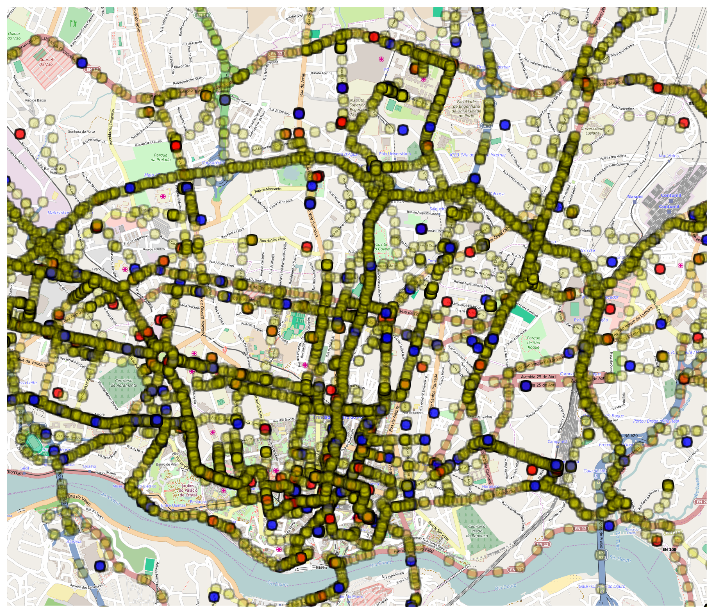

In [101]:
routes = new_df.route[:]
plot_route_onmap(routes)

(320, 11)